<a href="https://colab.research.google.com/github/arko-14/binary-prediction-with-rainfall/blob/main/binary_prediction_with_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [9]:
df

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0        0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1        1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2        2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3        3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4        4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
...    ...  ...       ...      ...          ...      ...       ...       ...   
2185  2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
0      88.0       1.1           60.0       17.2         1  
1      91.0       0.0           50.0       21.9         1  
2      47.0       8.3           70.0       18.1         1  
3      95.0       0.0           60.0       35.6         1  
4      45.0       3.6           40.0       24.8         0  
...     ...       ...            ...        ...       ...  
2185   88.0       0.1           40.0       22.1         1  
2186   88.0       0.0           50.0       35.3         1  
2187   79.0       5.0           40.0       32.9         1  
2188   93.0       0.1           40.0       18.0         1  
2189   88.0       1.0           70.0       48.0         1  

[2190 rows x 13 columns]

In [ ]:
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [18]:
df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

EDA

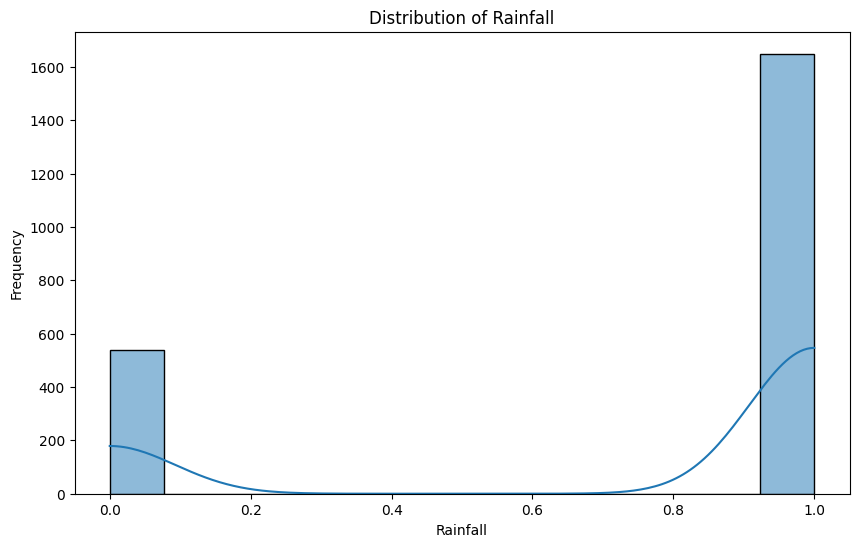

In [10]:
# Plotting the rainfall distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rainfall'], kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


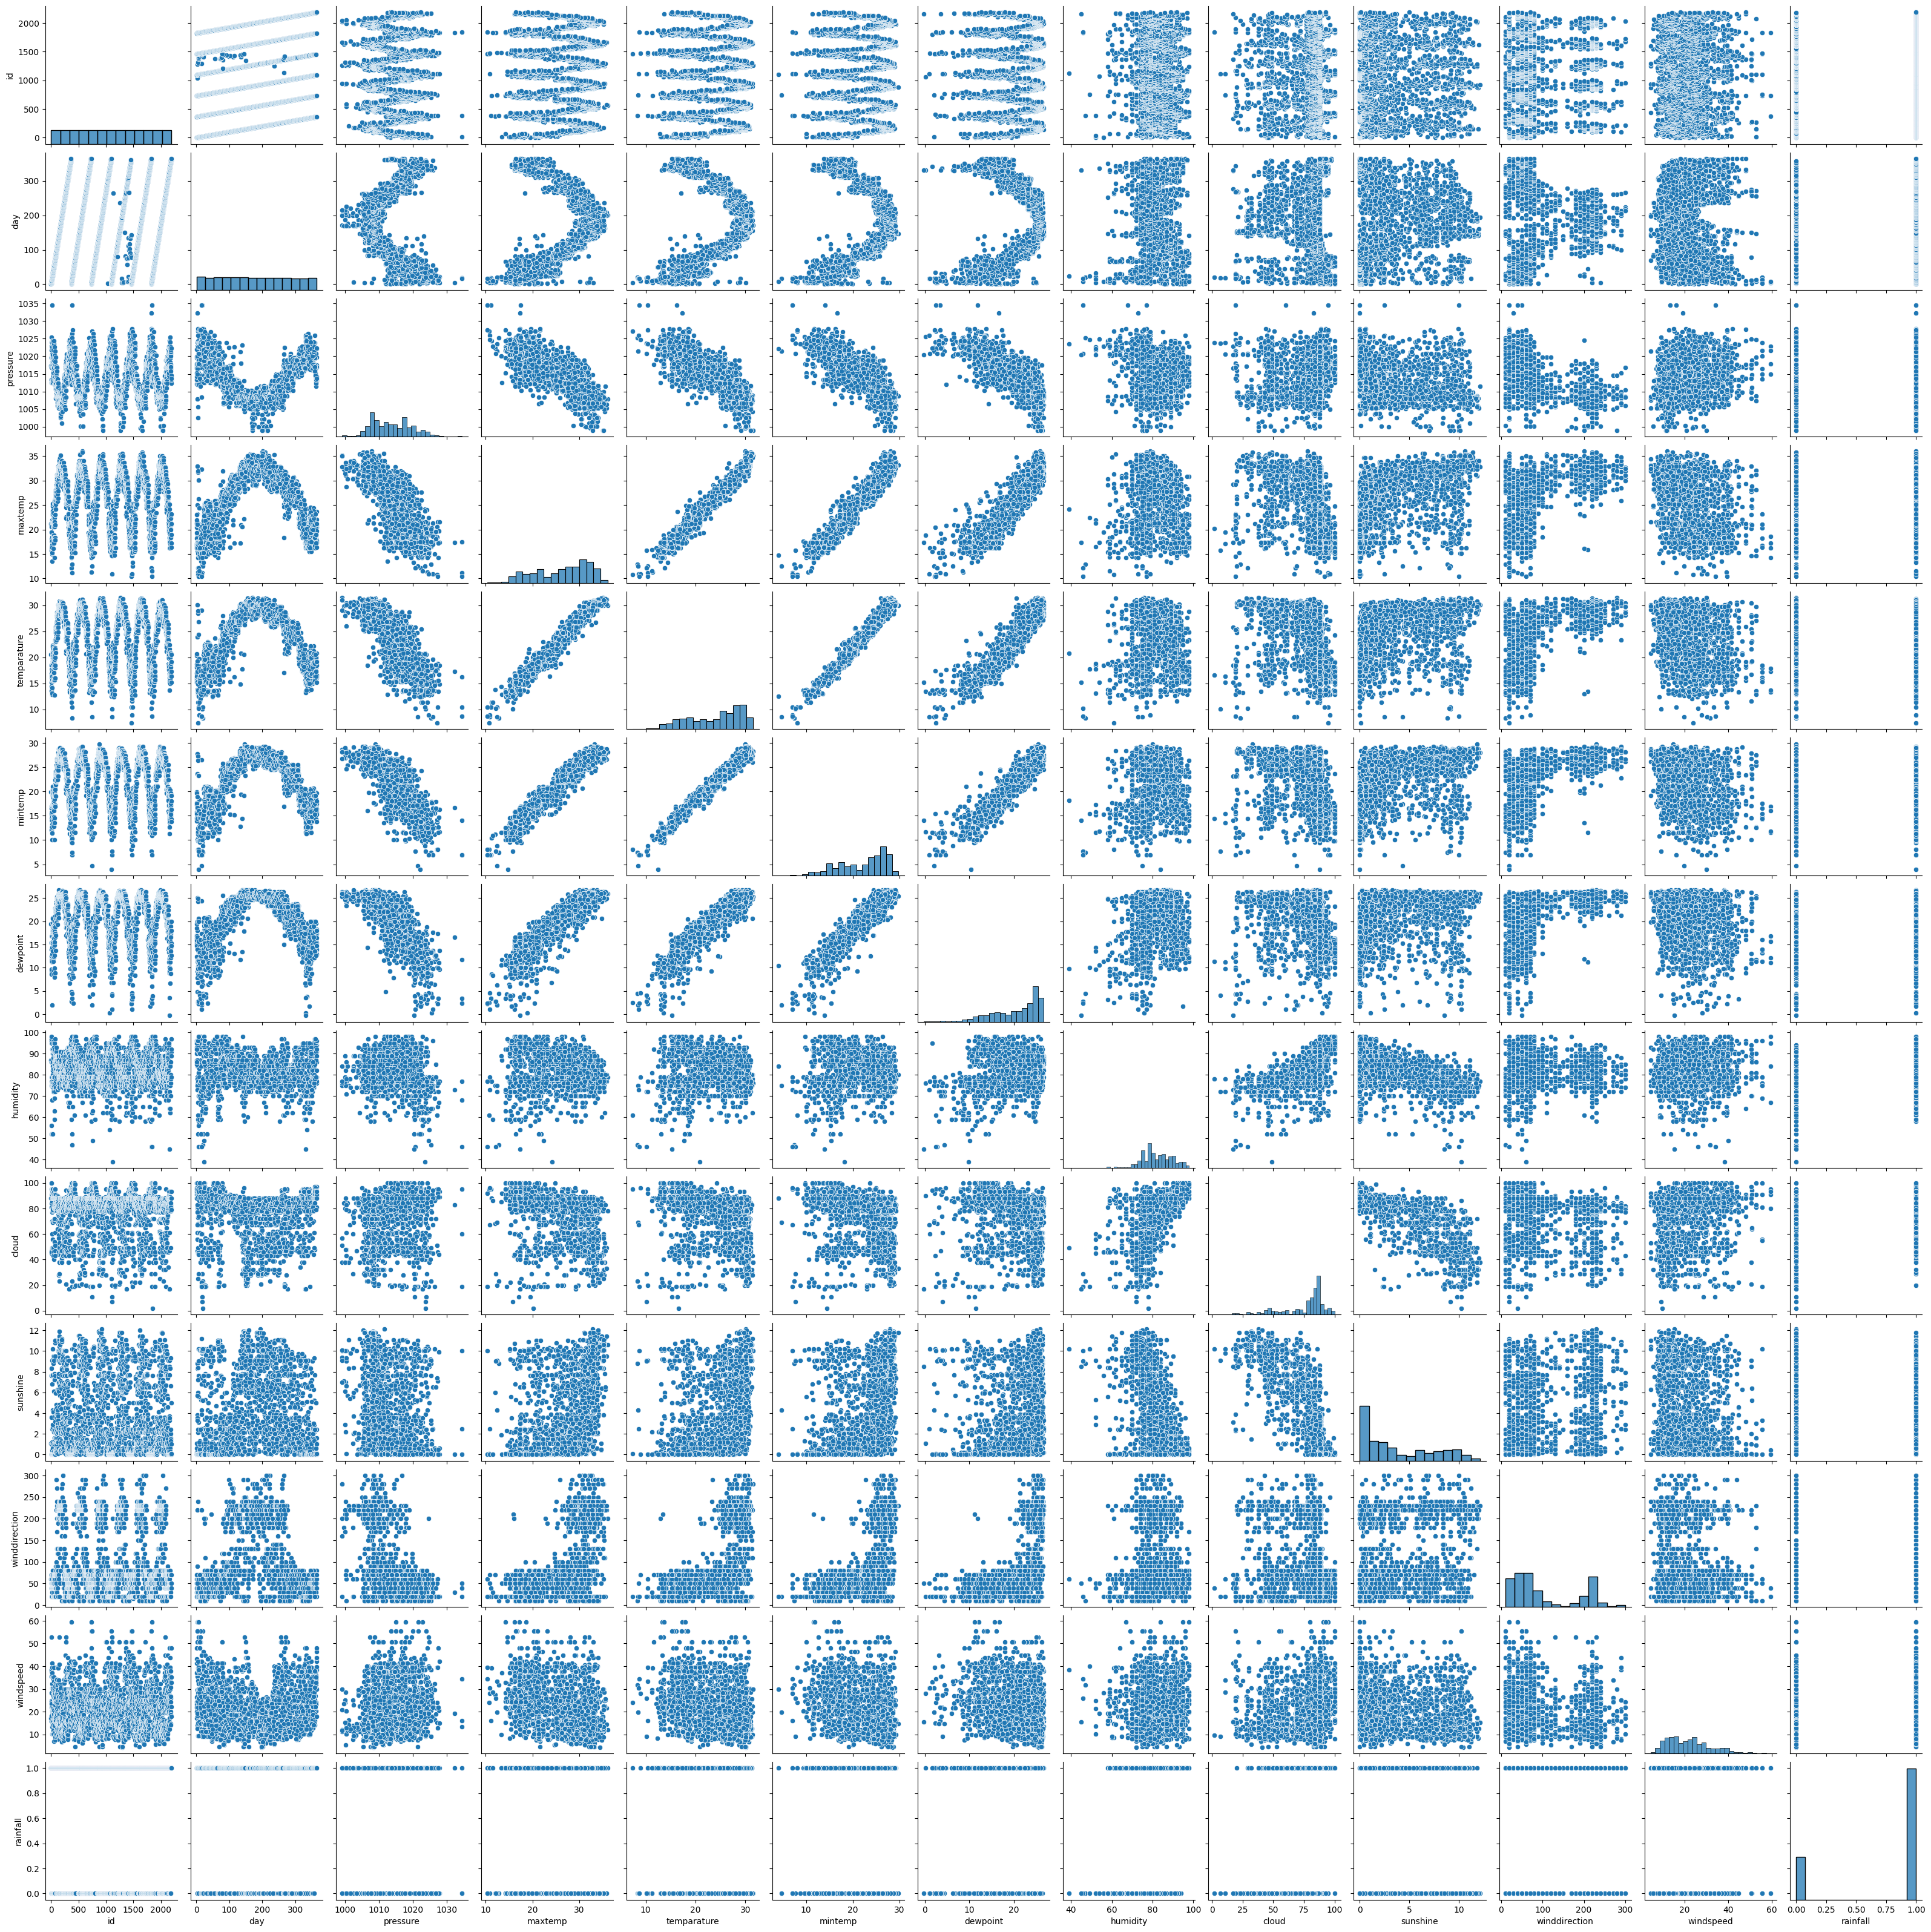

In [12]:

numerical_cols = df.select_dtypes(include=np.number).columns

# Create the scatter plot matrix
sns.pairplot(df[numerical_cols])
plt.show()


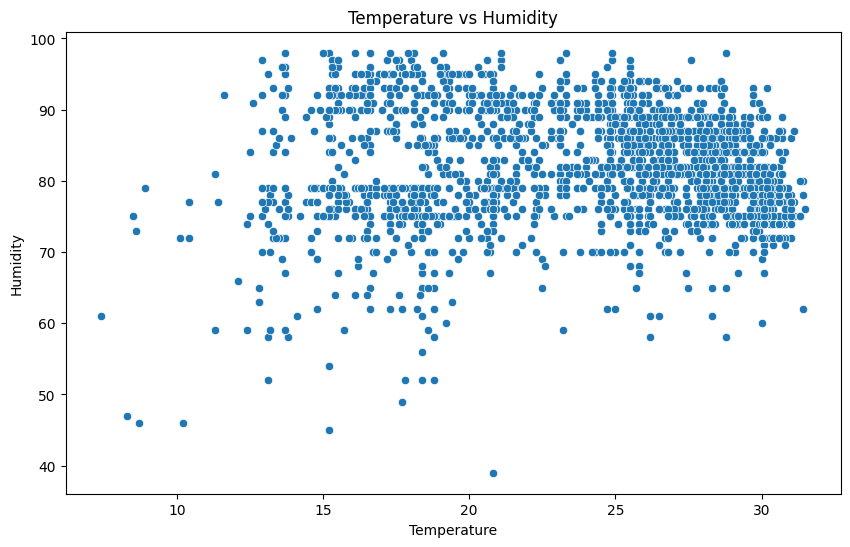

In [13]:
#Relationship between temperature and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temparature', y='humidity', data=df)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

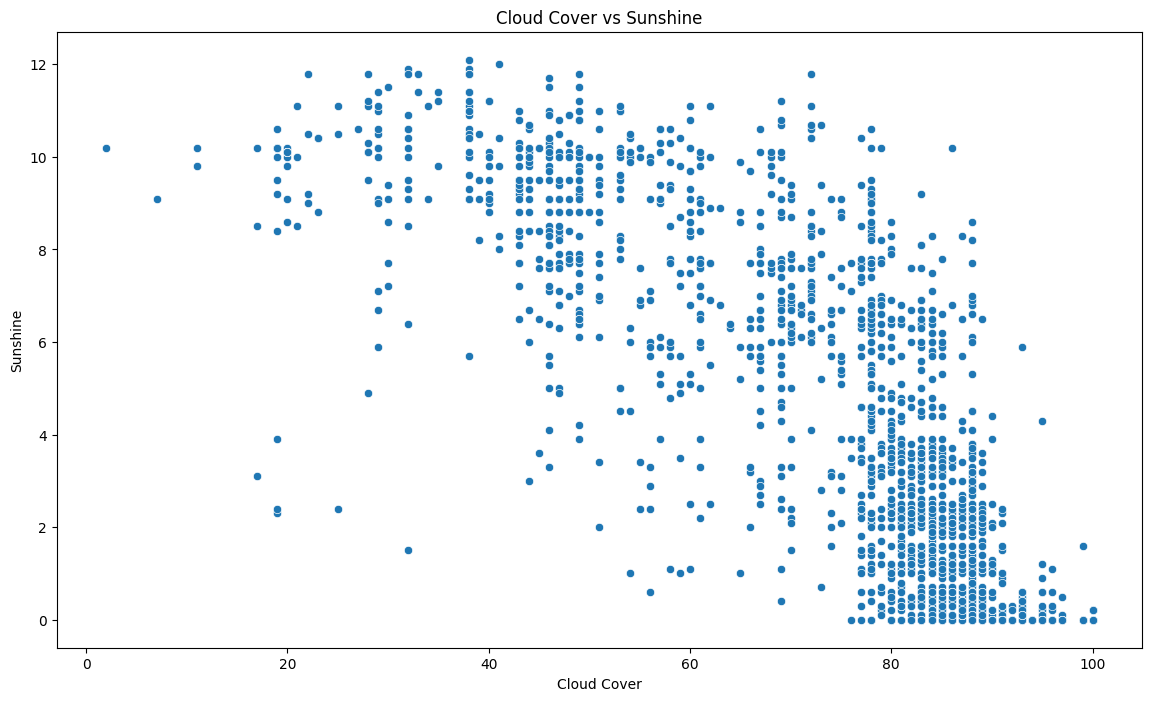

In [15]:
#ARelationship between cloud cover and sunshine
plt.figure(figsize=(14, 8))
sns.scatterplot(x='cloud', y='sunshine', data=df)
plt.title('Cloud Cover vs Sunshine')
plt.xlabel('Cloud Cover')
plt.ylabel('Sunshine')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

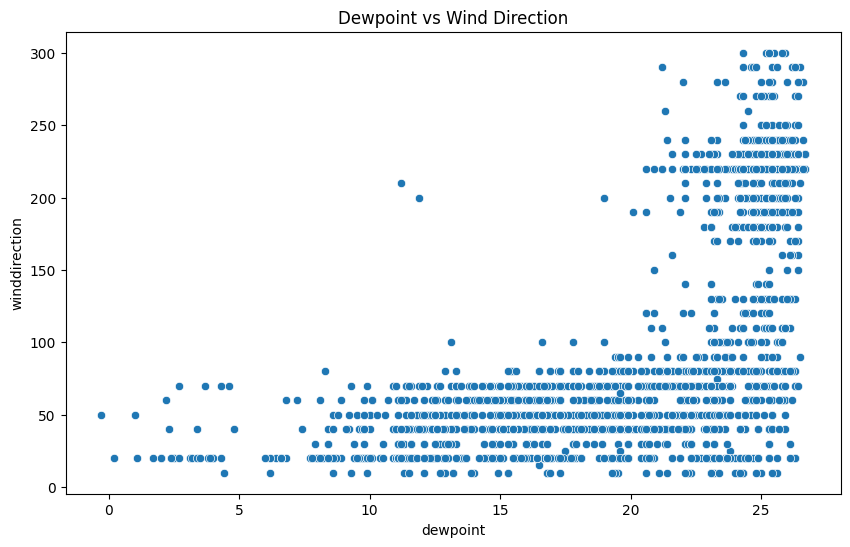

In [16]:
#Relationship between dewpoint and wind direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dewpoint', y='winddirection', data=df)
plt.title('Dewpoint vs Wind Direction')
plt

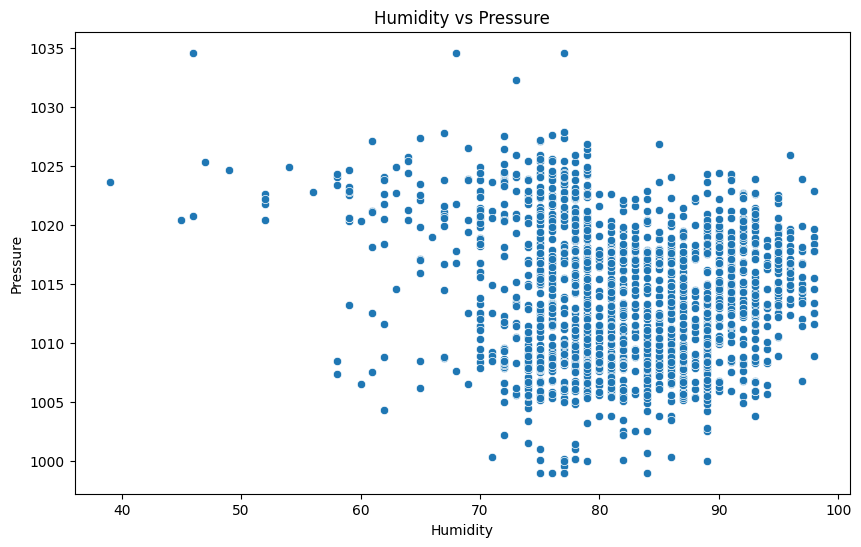

In [17]:
#Relationship between humidity and pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='pressure', data=df)
plt.title('Humidity vs Pressure')
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.show()

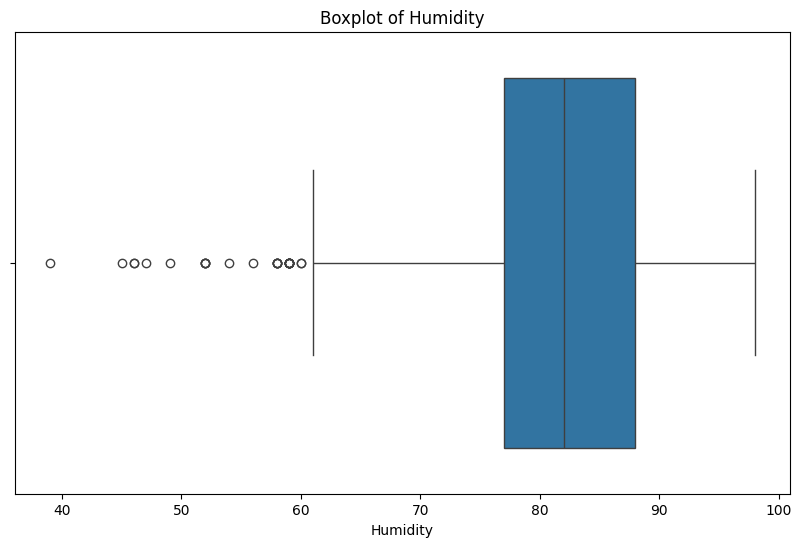

In [19]:
#check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='humidity', data=df)
plt.title('Boxplot of Humidity')
plt.xlabel('Humidity')
plt.show()

In [21]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("rainfall.html")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=39aabc197ba42f441ebfae1457469f5879e2601619a23e8c66a8033c455ac5a9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation matrix

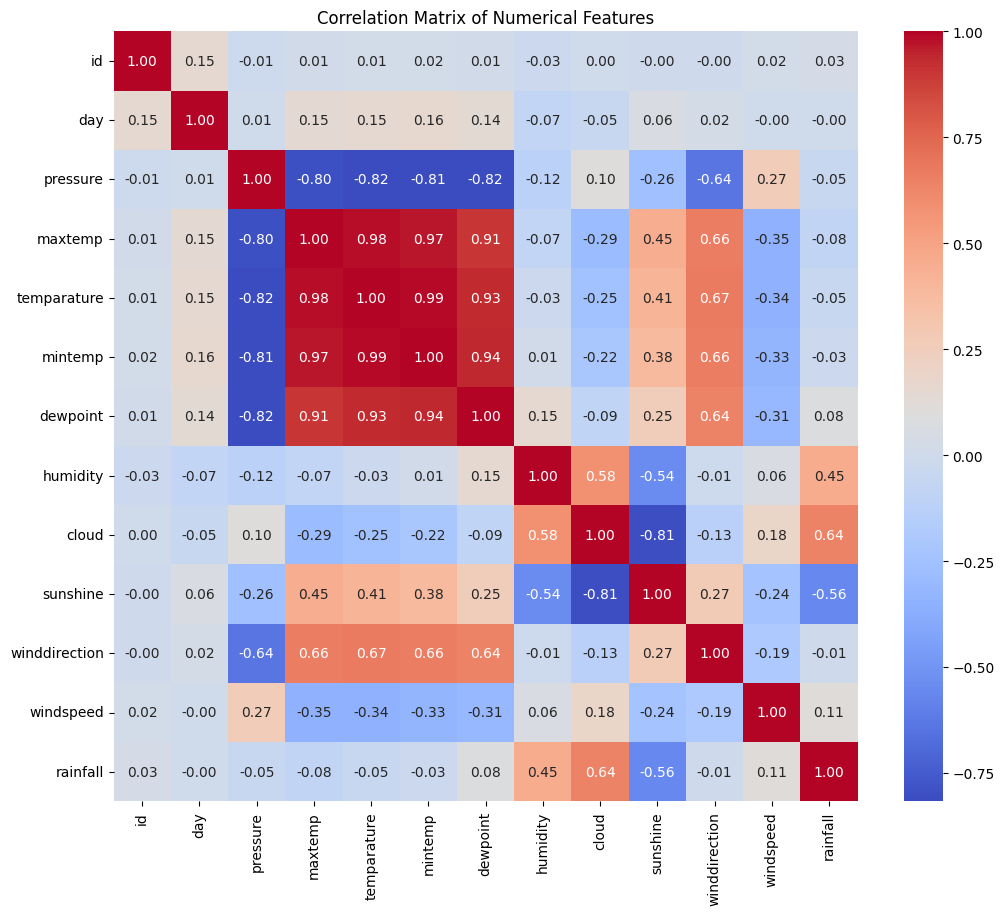

In [32]:
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [35]:
threshold = 0.85
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
df.drop(columns=highly_correlated_features, inplace=True)
print("Removed features:", highly_correlated_features)

Removed features: {'mintemp', 'temparature', 'dewpoint'}


In [36]:
df.head()

id  day  pressure  maxtemp  humidity  cloud  sunshine  winddirection  \
0   0    1    1017.4     21.2      87.0   88.0       1.1           60.0   
1   1    2    1019.5     16.2      95.0   91.0       0.0           50.0   
2   2    3    1024.1     19.4      75.0   47.0       8.3           70.0   
3   3    4    1013.4     18.1      95.0   95.0       0.0           60.0   
4   4    5    1021.8     21.3      52.0   45.0       3.6           40.0   

   windspeed  rainfall  
0       17.2         1  
1       21.9         1  
2       18.1         1  
3       35.6         1  
4       24.8         0

In [37]:
X = df.drop('rainfall', axis=1)
y = df['rainfall']


In [38]:
X

id  day  pressure  maxtemp  humidity  cloud  sunshine  winddirection  \
0        0    1    1017.4     21.2      87.0   88.0       1.1           60.0   
1        1    2    1019.5     16.2      95.0   91.0       0.0           50.0   
2        2    3    1024.1     19.4      75.0   47.0       8.3           70.0   
3        3    4    1013.4     18.1      95.0   95.0       0.0           60.0   
4        4    5    1021.8     21.3      52.0   45.0       3.6           40.0   
...    ...  ...       ...      ...       ...    ...       ...            ...   
2185  2185  361    1014.6     23.2      97.0   88.0       0.1           40.0   
2186  2186  362    1012.4     17.2      91.0   88.0       0.0           50.0   
2187  2187  363    1013.3     19.0      79.0   79.0       5.0           40.0   
2188  2188  364    1022.3     16.4      92.0   93.0       0.1           40.0   
2189  2189  365    1013.8     21.2      89.0   88.0       1.0           70.0   

      windspeed  
0          17.2  
1          21.9  
2          18.1  
3          35.6  
4          24.8  
...         ...  
2185       22.1  
2186       35.3  
2187       32.9  
2188       18.0  
2189       48.0  

[2190 rows x 9 columns]

In [41]:
df.shape

(2190, 10)

In [42]:
X.shape

(2190, 9)

In [43]:
y.shape

(2190,)

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Logistic Regression
lr_classifier = LogisticRegression()

# Bagging Classifier with Logistic Regression as base estimator
bagging_lr = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
y_pred_lr = bagging_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Bagging Logistic Regression Accuracy: {accuracy_lr}")


Bagging Logistic Regression Accuracy: 0.8515981735159818


In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define your base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=10
)


stacking_clf.fit(X_train, y_train)


y_pred = stacking_clf.predict(X_test)

# Calculate and print the combined accuracy
combined_accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {combined_accuracy}")


Stacking Ensemble Accuracy: 0.8561643835616438


In [62]:
training_features = X_train.columns
test_subset = test[training_features]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
test_subset = imputer.fit_transform(test_subset)

test_subset = pd.DataFrame(test_subset, columns=training_features)
predicts = stacking_clf.predict(test_subset)

In [64]:
print("Test Predictions:")
for pred in predicts:
    print(pred)

Test Predictions:
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [66]:
df = pd.DataFrame({'id': test["id"], 'rainfall': predicts.flatten()})

df.to_csv('predictions.csv', index=False)

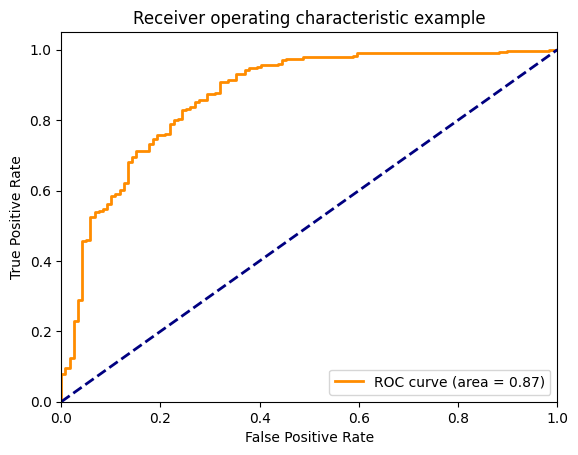

In [68]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
